# Gene-age distributions by algorithm

## This notebook was used to generate data for Figure 1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
binAges = pd.read_csv("../binAges_HUMAN.csv",index_col=0)
binAges = binAges[['InParanoid', 'InParanoidCore', 'PANTHER8_LDO','OMA_Groups', 'OMA_Pairs', 
    'RSD', 'EggNOG', 'Orthoinspector', 'Hieranoid_2', 'EnsemblCompara_v2', 
    'Metaphors', 'PhylomeDB','PANTHER8_all']]
binAges.head()

,InParanoid,InParanoidCore,PANTHER8_LDO,OMA_Groups,OMA_Pairs,RSD,EggNOG,Orthoinspector,Hieranoid_2,EnsemblCompara_v2,Metaphors,PhylomeDB,PANTHER8_all
Q8TEA1,Cellular_organisms,Euk_Archaea,Euk_Archaea,Eukaryota,Eukaryota,Cellular_organisms,Euk_Archaea,Cellular_organisms,Eukaryota,Euk_Archaea,Cellular_organisms,Cellular_organisms,Cellular_organisms
A6NIH7,Eumetazoa,Eukaryota,Eukaryota,Eukaryota,Eumetazoa,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Eukaryota
Q96HJ5,Mammalia,Mammalia,Mammalia,Mammalia,Mammalia,Mammalia,None,Mammalia,Eumetazoa,Vertebrata,Eumetazoa,Eumetazoa,Opisthokonta
O94913,Eukaryota,Eukaryota,Eukaryota,Vertebrata,Eumetazoa,Eukaryota,Opisthokonta,Eukaryota,Eukaryota,Eukaryota,Eukaryota,Vertebrata,Eukaryota
P37837,Cellular_organisms,Euk+Bac,Eukaryota,Euk+Bac,Euk+Bac,Cellular_organisms,Cellular_organisms,Cellular_organisms,Euk+Bac,Cellular_organisms,Cellular_organisms,Cellular_organisms,Cellular_organisms


### Get value counts for each database, normalize, and plot

In [3]:
ageCounts = binAges.apply(pd.value_counts)
ageCounts.drop(["None"],inplace=True)

In [4]:
ageFreqs = ageCounts.apply(lambda x: x/float(x.sum()))

In [5]:
cols = ["Cellular_organisms","Euk+Bac",
  "Euk_Archaea",
  "Eukaryota",
  "Opisthokonta",
  "Eumetazoa",
  "Vertebrata",
  "Mammalia"]

ageFreqsFlip = ageFreqs.T[cols]
ageFreqsFlip 

,Cellular_organisms,Euk+Bac,Euk_Archaea,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia
InParanoid,0.019371,0.032303,0.007983,0.135065,0.039221,0.136342,0.388058,0.241658
InParanoidCore,0.013931,0.038579,0.007769,0.157477,0.061834,0.233885,0.254354,0.232171
PANTHER8_LDO,0.024186,0.040328,0.010237,0.184544,0.040047,0.175994,0.329490,0.195174
OMA_Groups,0.006954,0.025822,0.005676,0.122718,0.041980,0.213274,0.335992,0.247584
OMA_Pairs,0.013173,0.042494,0.008233,0.149846,0.062414,0.200414,0.312918,0.210507
RSD,0.037012,0.070050,0.015331,0.233430,0.071650,0.223054,0.172672,0.176802
EggNOG,0.018813,0.050924,0.010250,0.296659,0.073046,0.313526,0.221083,0.015699
Orthoinspector,0.037235,0.056948,0.010901,0.245721,0.063366,0.275418,0.143949,0.166463
Hieranoid_2,0.023249,0.056222,0.008611,0.322190,0.090817,0.264904,0.125867,0.108140
EnsemblCompara_v2,0.043274,0.060271,0.019656,0.291293,0.063608,0.282117,0.125391,0.114390


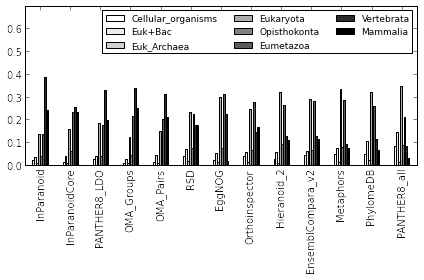

In [6]:
ax = ageFreqsFlip.plot(kind='bar',colormap='Greys', ylim=(0,.7),legend=False)
ax.grid(False)
xLeft,xRight = ax.get_xlim()

plt.tight_layout()
plt.legend(loc=0,ncol=3,prop={'size':9})

#plt.savefig("ageDistributions.svg")